# Clusterization of Differences

In [423]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns

In [424]:
calm, frust = calm.values, frust.values
delta = calm-frust

In [425]:
from sklearn.preprocessing import scale
delta =scale(delta)

## Visualization

(101, 198)


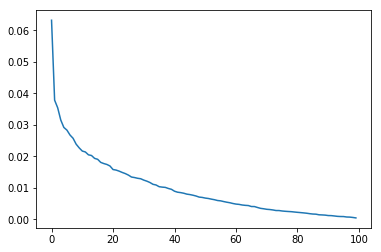

In [426]:
from sklearn.decomposition import PCA
print(delta.shape)
pca = PCA(100).fit(delta)
y = pca.explained_variance_ratio_
import matplotlib.pylab as plt
%matplotlib inline
plt.plot([i for i in range(len(y))], y)
#keys[pca.mean_.argmax()]

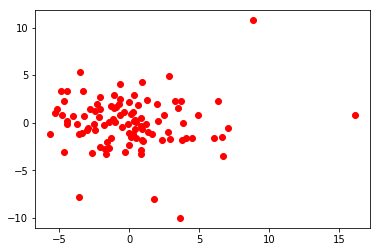

In [427]:
pca = PCA(2).fit(delta)
delta_ = pca.transform(delta)
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(delta_[:,0], delta_[:,1], 'ro')

## Clustering

0 37
1 64


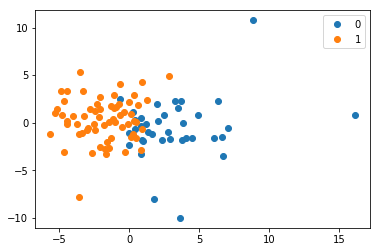

In [428]:
from sklearn.cluster import KMeans
y = KMeans(n_clusters=2, n_init = 1000).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib inline
classes = [i for i in range(min(y), max(y)+1)]
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)

In [450]:
X, y = delta, y
print(X.shape)
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.015, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
_ = model.get_support()
keys[[ind for ind, i in enumerate(_) if i]]

(101, 198)
(101, 5)


Index(['Средняя длина слов (в количестве символов)',
       'Доля глаголов прошедшего времени, первого лица, единственного числа',
       'Коэффициент Трейгера', 'Часть речи: местоимение-существительное',
       'Сем. связь: DLB'],
      dtype='object')

## Тональность

In [406]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = [i for i in calm.columns if 'Тональность' in i]
calm, frust = calm[keys].values, frust[keys].values
delta = calm-frust

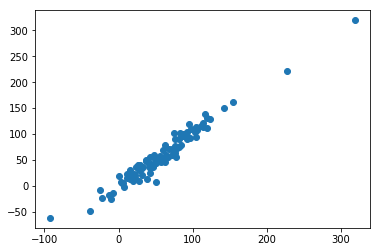

In [407]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(delta[:, 0], delta[:, 1], 'o')

In [408]:
delta = list(delta[:,0])
delta.sort()
delta_ = [delta[ind+1]-i for ind,i in enumerate(delta[:-1]) if 0<i<200 and 0<delta[ind+1]<200]
print('Mean distance between point in segment [0,200] is equal to',sum(delta_)/len(delta_))

Mean distance between point in segment [0,200] is equal to 1.6813186813186813


# Clusterization of Pairs

In [467]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
#keys = [i for i in calm.columns if 'Тональность' in i] + ['ID']
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = np.hstack((calm.columns,frust.columns))
print(len(keys))

396


In [468]:
calm, frust = calm.values, frust.values
delta = np.hstack((calm, frust))

In [469]:
from sklearn.preprocessing import scale
delta =scale(delta)

## Visualization

(101, 396)


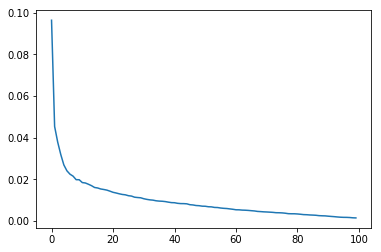

In [470]:
from sklearn.decomposition import PCA
print(delta.shape)
pca = PCA(100).fit(delta)
y = pca.explained_variance_ratio_
import matplotlib.pylab as plt
%matplotlib inline
plt.plot([i for i in range(len(y))], y)
#keys[pca.mean_.argmax()]

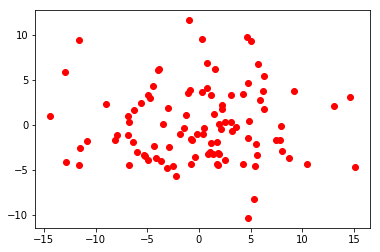

In [471]:
pca = PCA(2).fit(delta)
delta_ = pca.transform(delta)
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(delta_[:,0], delta_[:,1], 'ro')

## Clustering

0 38
1 63


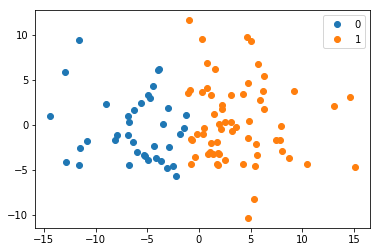

In [472]:
from sklearn.cluster import KMeans
y = KMeans(n_clusters=2, n_init = 1000, n_jobs = -1).fit_predict(PCA(10).fit_transform(delta))
import matplotlib.pylab as plt
%matplotlib inline
classes = [i for i in range(min(y), max(y)+1)]
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)

In [474]:
X, y = delta, y
print(X.shape)
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
_ = model.get_support()
keys[[ind for ind, i in enumerate(_) if i]]

(101, 396)
(101, 10)


array(['Средняя длина слов (в количестве символов)',
       'Словарь: Канцеляризмы', 'Часть речи: местоимение-существительное',
       'Число знаков пунктуации / Число слов',
       'Средняя длина слов (в количестве символов)',
       'Причастия + деепричастия / Число предложений',
       'Доля глаголов 2 лица', 'Словарь: Компьютерный жаргон',
       'Часть речи: прилагательное', 'Часть речи: глагол'], dtype=object)

## Тональность

In [389]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['Тональность слов (по округленным значениям)']
calm, frust = calm[keys].values, frust[keys].values
delta = np.hstack((calm, frust))

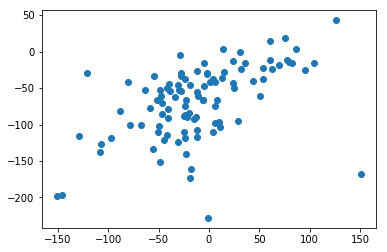

In [395]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(delta[:,0], delta[:,1], 'o')